# CS675 Introduction to Data Science - Project #1

**Aayushi Verma (#U01865004)**

The aim of this project is to perform a deep-dive EDA (Exploratory Data Analysis) on a dataset and prepare it for further machine learning modeling (next project). We will start by examining the raw dataset, cleaning it, visualizing it, and preparing it for feeding into a machine learning model. We will detail our insights from this EDA.

The dataset is a CSV file containing data about customer churn from the telecommunication industry. Churn is an important metric for businesses to analyze because high churn rates indicate unsatisfied customers, whereas low churn rates indicate satisfied customers, i.e. customers are less likely to leave this company and take their business elsewhere. Therefore it is important for companies to be able to understand their churn rates, predict future churn rates, and optimize their services to have continuing low churn rates.

In [1]:
# importing packages for data cleaning, visualization, and EDA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly
import statsmodels
import pandas_profiling as pd_pr
import sweetviz as sv
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# reading the raw CSV data file
df = pd.read_csv("telco-customer-churn.csv")

First, we will inspect the raw data.

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step One: Prep the data in order to be ready to be fed to a model.
- Look for missing, null, NaN records.
- Find outliers.
- Transform data – all entries should be numeric.

We will inspect for NAs in the dataframe.

In [4]:
# finding columns in the df which have any null/na values
np.where(pd.isna(df))

(array([], dtype=int64), array([], dtype=int64))

In [5]:
# Checking the missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We find there are no NA values in the dataframe. 

Let's now inspect the shape of the dataframe, and the types of data each column contains.

In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


So we find that there are 21 columns in the dataframe, most of which are 'object' types. From our earlier inspection of the raw data, this means textual fields. There are 3 numerical fields, two of which have integer values, and one of which has float values. Our target variable, 'Churn', is the last column of the dataframe, and we note that it is of type 'object'. The second column of this output confirms what we saw earlier: that there are no null values in the dataframe.

Let's get a summary of the numerical columns. By default, pandas won't provide a statistical summary for object columns, since they are non-numerical.

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
corr = df.corr()
corr.style.background_gradient('coolwarm')

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


We find that the average tenure is ~32 months, the average monthly charges for customers is ~$64.76, and there is a lower proportion of senior citizens. We find that these three numerical variables are also not very correlated with each other.

However, this does not present a full picture of the data. We should convert the object columns into numerical values, so that we can provide quantitative analysis on the whole dataset.

In [10]:
# getting unique values from each column, so we know which values to convert to numerical
for col in df.columns:
    print(col,df[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

We have just obtained a list of the unique values in each column. From this, we will assign each of these text values a number. We will use 0 and 1 to represent binary data (yes/no, male/female), and assign unique integer values to everything else.

In [11]:
for col in df.columns:
    # we will only use 0 and 1 for binary values
    df.loc[df[col] == "Yes", col] = 1
    df.loc[df[col] == "No", col] = 0
    df.loc[df[col] == "Female", col] = 0
    df.loc[df[col] == "Male", col] = 1
    # everything else we will represent with a distinct integer
    df.loc[df[col] == "No phone service", col] = 2
    df.loc[df[col] == "No internet service", col] = 3
    df.loc[df[col] == "DSL", col] = 4
    df.loc[df[col] == "Fiber optic", col] = 5
    df.loc[df[col] == "Month-to-month", col] = 6
    df.loc[df[col] == "One year", col] = 7
    df.loc[df[col] == "Two year", col] = 8
    df.loc[df[col] == "Electronic check", col] = 9
    df.loc[df[col] == "Mailed check", col] = 10
    df.loc[df[col] == "Bank transfer (automatic)", col] = 11
    df.loc[df[col] == "Credit card (automatic)", col] = 12
    # we will set missing values to -1, so that we know that these correspond to missing values
    df.loc[df[col] == " ", col] = -1

In [12]:
# checking the unique values in the transformed dataframe
for col in df.columns:
    print(col,df[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender [0 1]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService [0 1]
MultipleLines [2 0 1]
InternetService [4 5 0]
OnlineSecurity [0 1 3]
OnlineBackup [1 0 3]
DeviceProtection [0 1 3]
TechSupport [0 1 3]
StreamingTV [0 1 3]
StreamingMovies [0 1 3]
Contract [6 7 8]
PaperlessBilling [1 0]
PaymentMethod [9 10 11 12]
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn [0 1]


## Step Two: List all types of data, numeric, categorical, text.

Now we check the data columns again.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We find that even though we assigned numerical values, the types of the columns have not changed from object. We need to do this manually.

In [14]:
# obtaining list of all columns which we need to convert
cols_to_convert_to_int = df.columns[np.where(df.dtypes=="object")]
cols_to_convert_to_int = cols_to_convert_to_int[1:] # we are excluding the customerID column

In [15]:
# converting each of the targeted columns to integer type
for col in cols_to_convert_to_int:
    df[col] = pd.to_numeric(df[col])

In [16]:
# checking the data types
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

We find that all columns in the dataframe, except for customerID have been successfully transformed to integer type, and in the case of MonthlyCharges and TotalCharges, we find that they have retained their float type. This is a success! Now we can proceed with our EDA of this dataset, now that it is in a numerical format, rather than categorical. First we will drop the CustomerID column since it is not relevant.

In [17]:
df = df.drop([0])

In [18]:
# getting correlation matrix of matrix
corr = df.corr()
corr.style.background_gradient('coolwarm')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001937,-0.001660,0.010424,0.004924,-0.006931,-0.000182,-0.008017,-0.000329,0.000789,0.005518,0.002689,0.002861,0.001949,0.000007,-0.011636,-0.005374,-0.014738,-0.000223,-0.008699
SeniorCitizen,-0.001937,1.000000,0.016545,-0.211235,0.016489,0.008391,0.100048,0.221744,-0.208771,-0.170004,-0.172992,-0.217630,-0.155335,-0.149069,-0.142615,0.156591,-0.093786,0.220125,0.102953,0.150858
Partner,-0.001660,0.016545,1.000000,0.452821,0.379958,0.018168,0.090707,-0.000480,0.056282,0.059543,0.064720,0.047544,0.054748,0.051775,0.294965,-0.015000,0.133306,0.097035,0.317696,-0.150375
Dependents,0.010424,-0.211235,0.452821,1.000000,0.159617,-0.002047,-0.016685,-0.162027,0.179553,0.161111,0.156936,0.172974,0.146432,0.136579,0.243130,-0.111309,0.123753,-0.114012,0.061991,-0.164286
tenure,0.004924,0.016489,0.379958,0.159617,1.000000,0.007900,0.242766,0.038474,0.085368,0.107656,0.107517,0.084769,0.077933,0.081016,0.671567,0.006304,0.340168,0.247742,0.826152,-0.352388
PhoneService,-0.006931,0.008391,0.018168,-0.002047,0.007900,1.000000,-0.690831,-0.072421,0.146277,0.164651,0.156366,0.144967,0.179240,0.174982,0.001890,0.016877,-0.004570,0.247082,0.112866,0.011689
MultipleLines,-0.000182,0.100048,0.090707,-0.016685,0.242766,-0.690831,1.000000,0.271614,-0.271359,-0.256584,-0.249549,-0.269511,-0.252153,-0.247786,0.078890,0.108020,0.031015,0.146562,0.251023,0.019610
InternetService,-0.008017,0.221744,-0.000480,-0.162027,0.038474,-0.072421,0.271614,1.000000,-0.924893,-0.900158,-0.899131,-0.923574,-0.880128,-0.880691,-0.272346,0.358190,-0.146872,0.854598,0.413503,0.273858
OnlineSecurity,-0.000329,-0.208771,0.056282,0.179553,0.085368,0.146277,-0.271359,-0.924893,1.000000,0.884473,0.883188,0.902483,0.861975,0.863447,0.352115,-0.341641,0.187394,-0.694609,-0.238238,-0.308079
OnlineBackup,0.000789,-0.170004,0.059543,0.161111,0.107656,0.164651,-0.256584,-0.900158,0.884473,1.000000,0.879606,0.885609,0.870916,0.869145,0.326773,-0.294574,0.166877,-0.642307,-0.194075,-0.280776


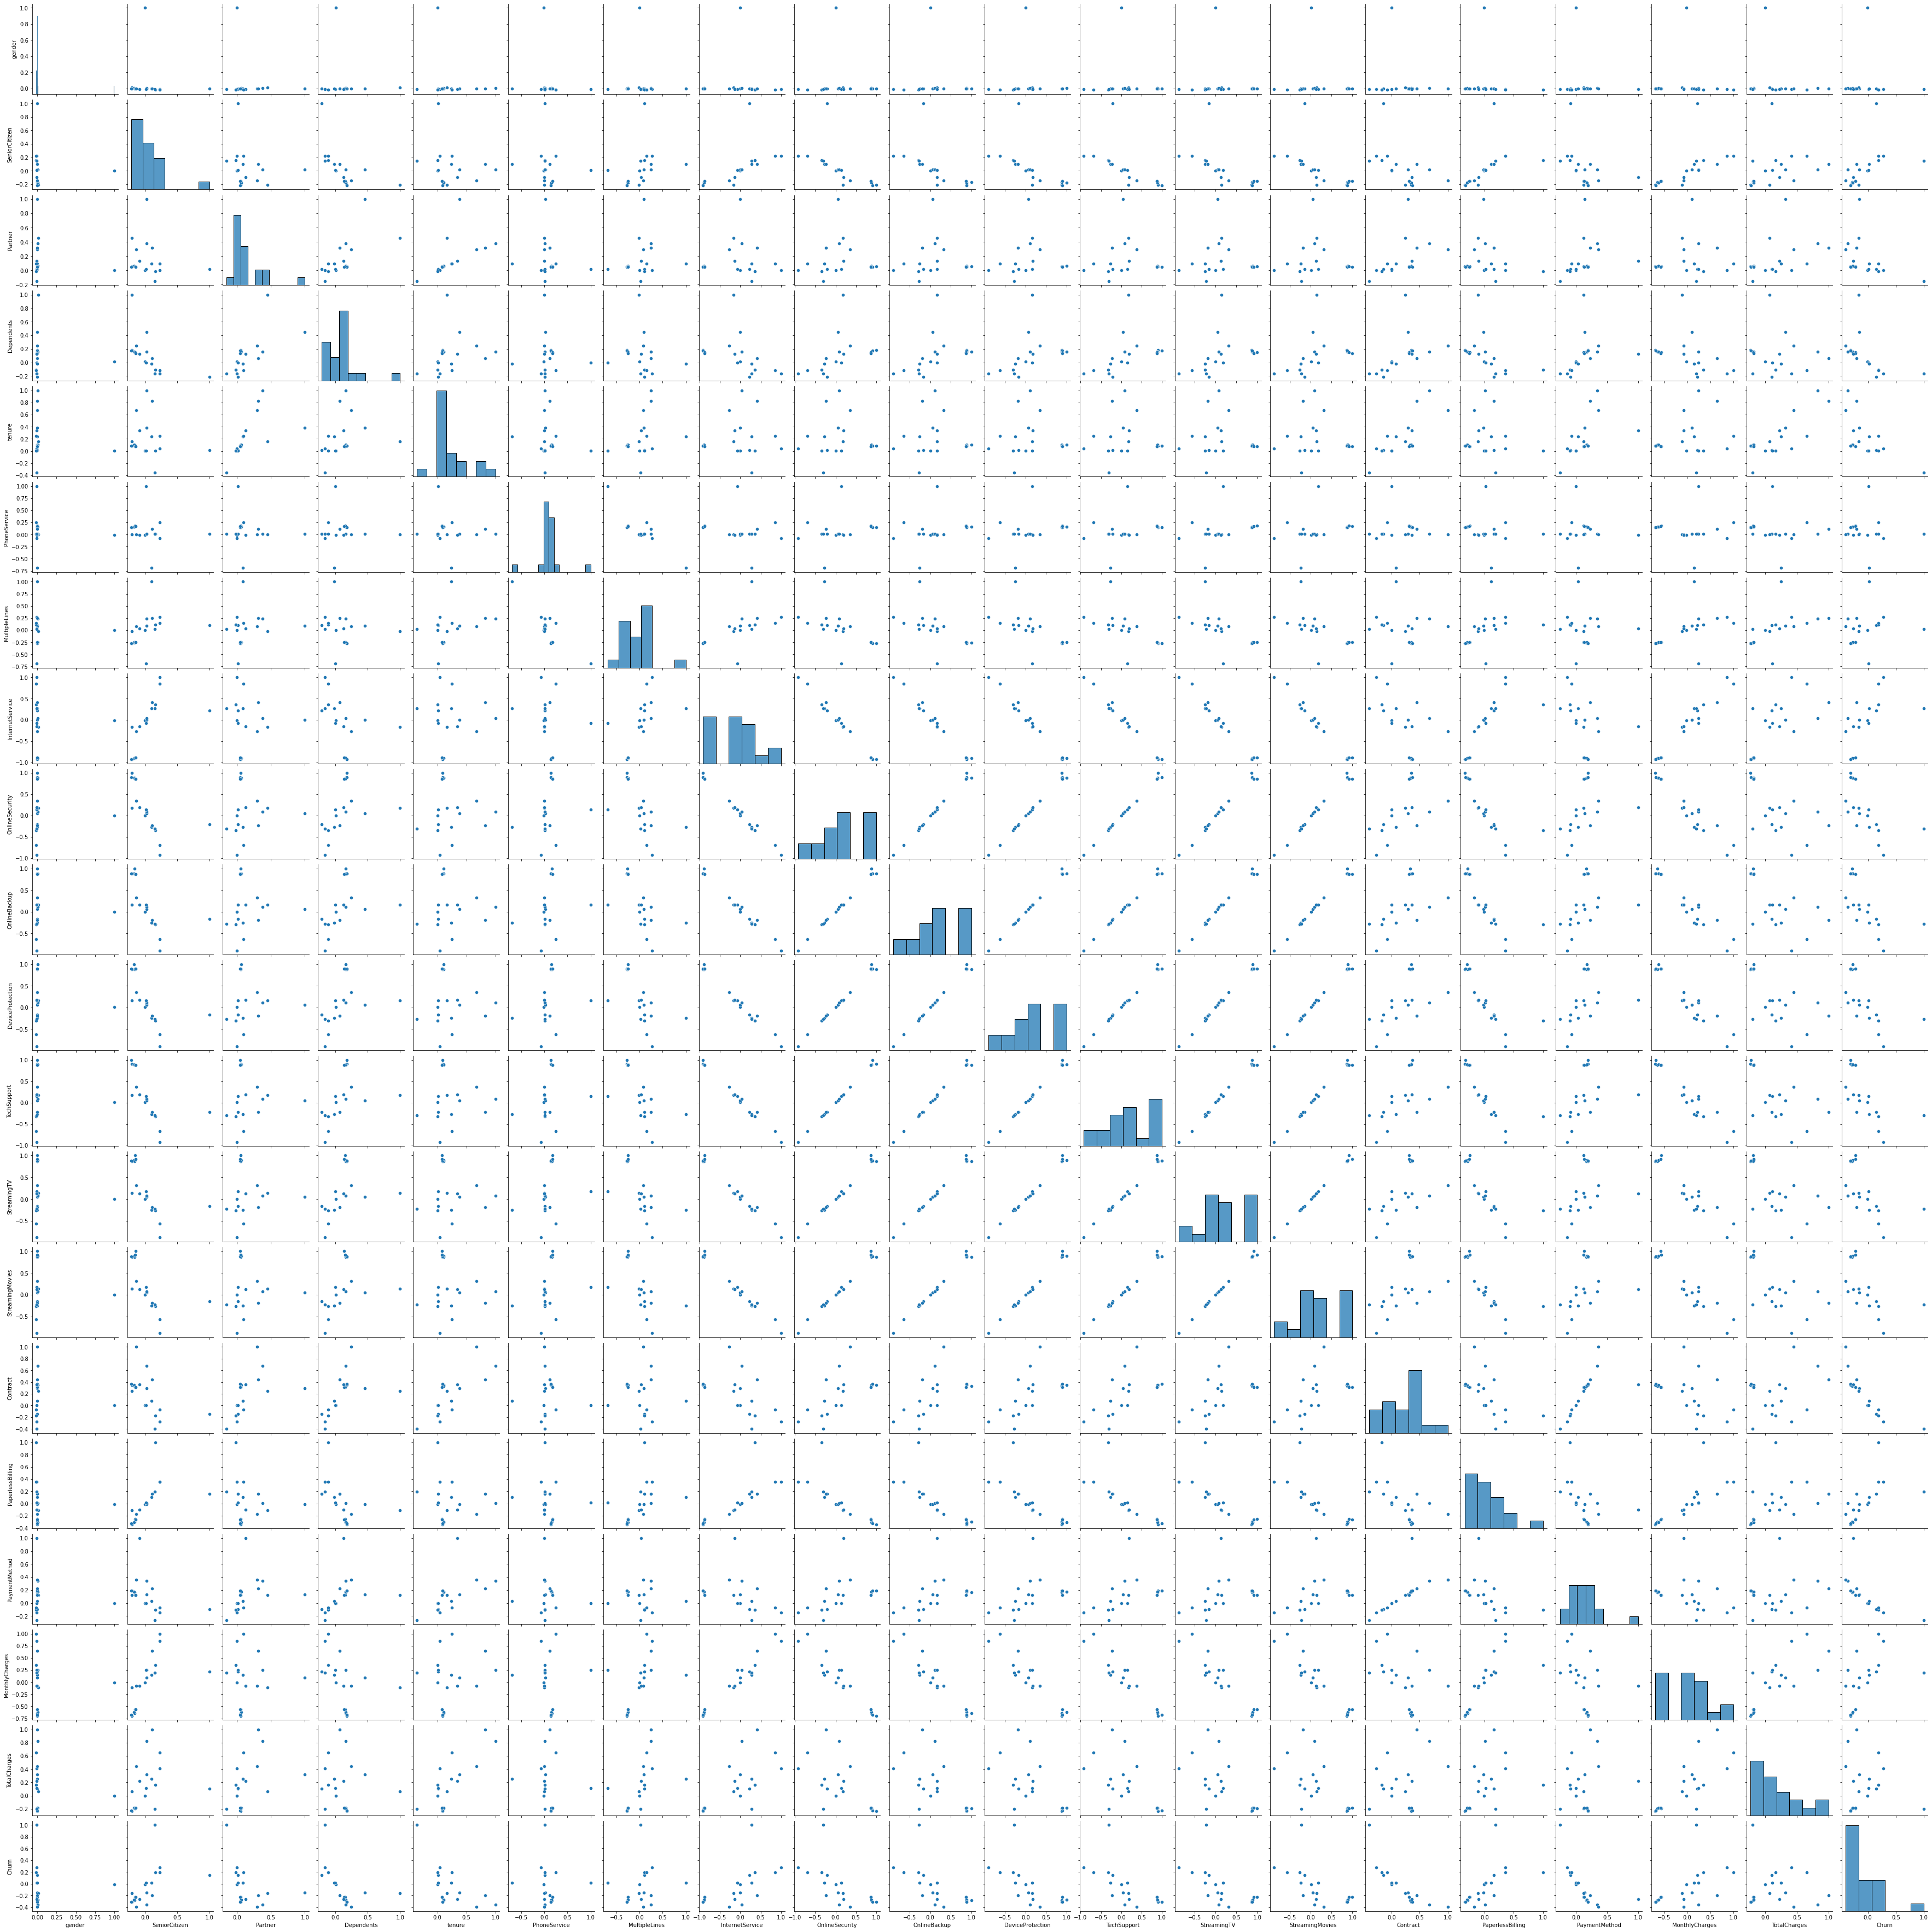

In [19]:
# plotting correlation of variables against each other
sns.pairplot(corr)

<AxesSubplot:>

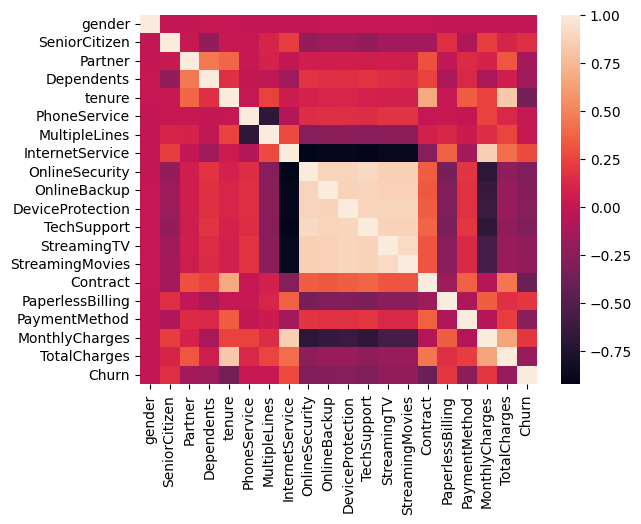

In [20]:
# plotting a heatmap of the correlation
sns.heatmap(corr)

We find that variables such as OnlineSecurity, DeviceProtection, etc. which are add-ons, seem to be highly correlated to each other, but not really with anything else in the data. We will explore this result in the next section.

## Step Three: Perform EDA on data.
- Present dependencies and correlations among the various features in the data.
- List the most important variables (Feature Importance) that will affect the target label.

In [21]:
# generating a SweetViz report for the dataframe
initial_eda = sv.analyze(df)
initial_eda.show_html('initial_eda.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report initial_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Now we want to perform analysis on the Churn variable, to see which variables affect Churn. Let's start by extracting the correlation values for Churn.

In [22]:
# obtaining correlations for Churn
corr['Churn'].sort_values(ascending=False)

Churn               1.000000
InternetService     0.273858
MonthlyCharges      0.193281
PaperlessBilling    0.191910
SeniorCitizen       0.150858
MultipleLines       0.019610
PhoneService        0.011689
gender             -0.008699
Partner            -0.150375
Dependents         -0.164286
TotalCharges       -0.198427
StreamingTV        -0.223221
StreamingMovies    -0.224312
PaymentMethod      -0.262947
DeviceProtection   -0.274047
OnlineBackup       -0.280776
TechSupport        -0.306123
OnlineSecurity     -0.308079
tenure             -0.352388
Contract           -0.396813
Name: Churn, dtype: float64

We will now analyze each variable against Churn to see how they affect Churn, and their distributions.

<AxesSubplot:xlabel='Churn', ylabel='InternetService'>

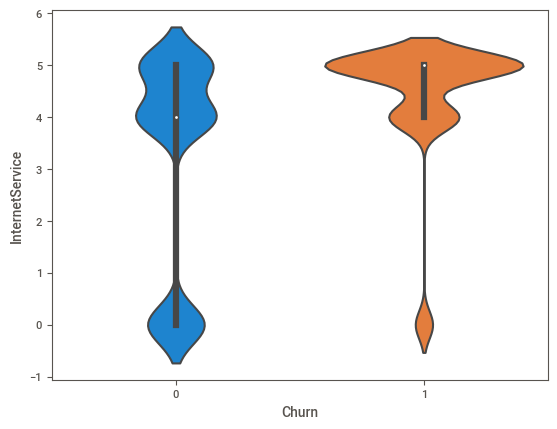

In [23]:
sns.violinplot(df['Churn'],df['InternetService'])

The values for InternetService are 4=DSL, 5=Fiber optic, and 0=No. We see that a wider distribution of customers with fiber optic tend to churn the most amongst all 3 options. Customers tend to churn less if they do not have internet service. Finally, roughly an even proportion of customers with DSL will churn.

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

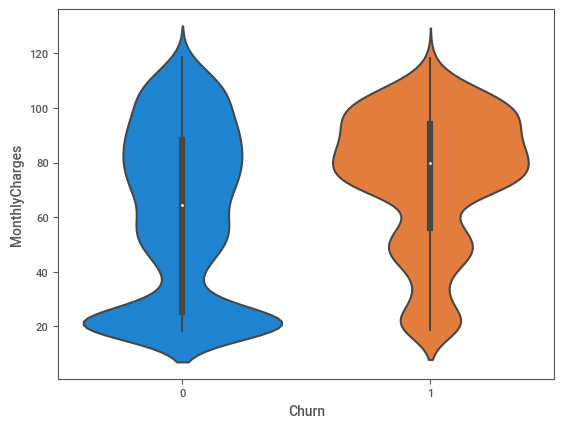

In [24]:
sns.violinplot(df['Churn'],df['MonthlyCharges'])

For MonthlyCharges, customers with lower charges each month churn less than customers with higher charges each month.

<AxesSubplot:xlabel='Churn', ylabel='PaperlessBilling'>

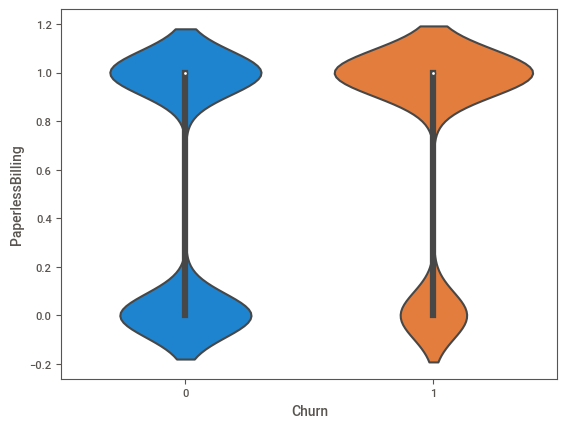

In [25]:
sns.violinplot(df['Churn'],df['PaperlessBilling'])

There is a wider distribution of customers with paperless billing who will churn, compared to those who don't churn. There is a wider distribution of customers who do not have paperless billing who will not churn, compared to a smaller distribution of customers without paperless billing who churn.

<AxesSubplot:xlabel='Churn', ylabel='SeniorCitizen'>

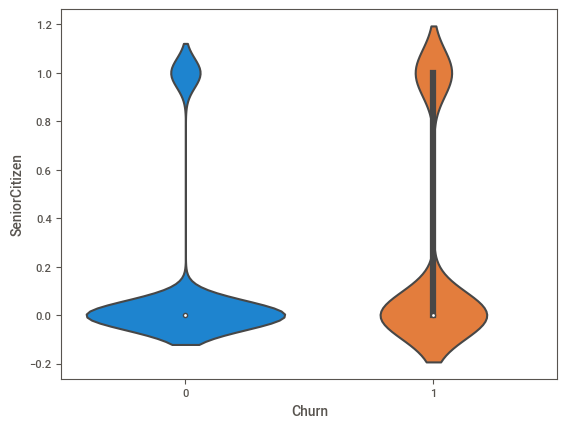

In [26]:
sns.violinplot(df['Churn'],df['SeniorCitizen'])

There is a wider distribution of people who are not senior citizens, who do not churn. 

<AxesSubplot:xlabel='Churn', ylabel='MultipleLines'>

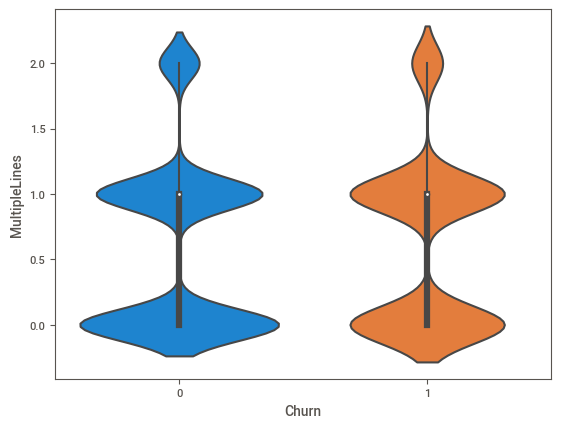

In [27]:
sns.violinplot(df['Churn'],df['MultipleLines'])

For MultipleLines, 0=no, 1=yes, and 2=no phone service. There are roughly even proportions of customers with/without multiple lines who churn/do not churn.

<AxesSubplot:xlabel='Churn', ylabel='PhoneService'>

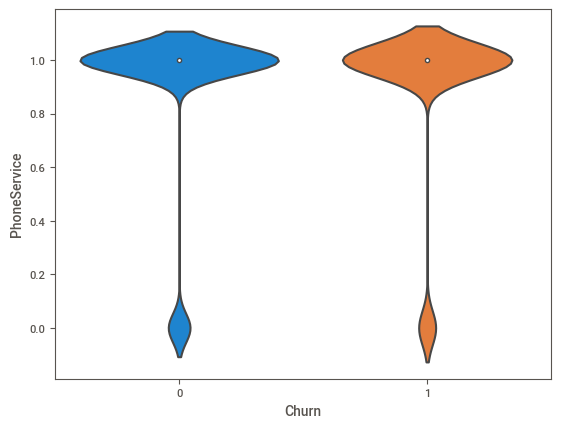

In [28]:
sns.violinplot(df['Churn'],df['PhoneService'])

There are less customers without phone service, but they churn/not churn roughly equally.

Now that we have checked all the variables that correlate highly with churn, let's check the negatively-correlating variables, in case that provides any more insight.

<AxesSubplot:xlabel='Churn', ylabel='gender'>

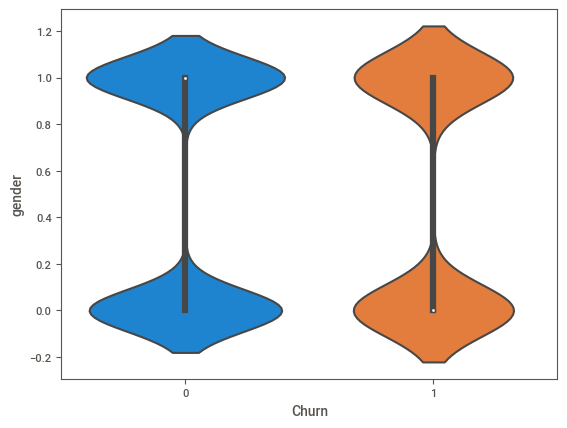

In [29]:
sns.violinplot(df['Churn'],df['gender'])

Gender does not seem to make a very large impact on churn, as 0=females and 1=males have even distributions of churning/not churning.

<AxesSubplot:xlabel='Churn', ylabel='Partner'>

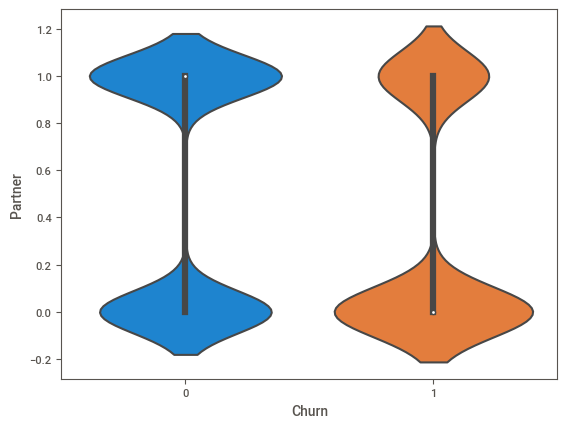

In [30]:
sns.violinplot(df['Churn'],df['Partner'])

There is a wider distribution of customers with a partner who do not churn, compared to those who do churn. Customers without partners tend to churn slightly more.

<AxesSubplot:xlabel='Churn', ylabel='Dependents'>

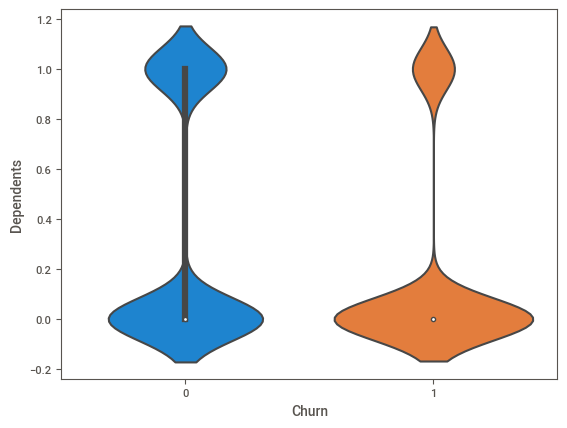

In [31]:
sns.violinplot(df['Churn'],df['Dependents'])

Customers without dependents tend to churn a lot more than customers with dependents.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

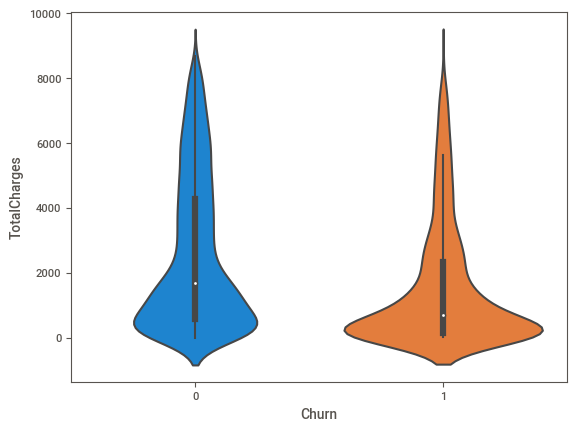

In [32]:
sns.violinplot(df['Churn'],df['TotalCharges'])

There is a wider spread of customers with lower total charges tend to churn more than customers with higher total charges.

<AxesSubplot:xlabel='Churn', ylabel='StreamingTV'>

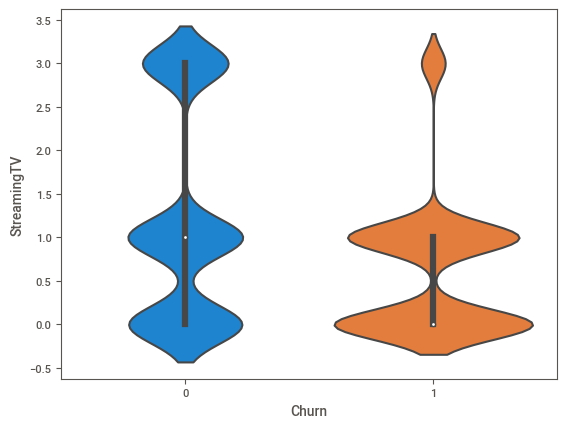

In [33]:
sns.violinplot(df['Churn'],df['StreamingTV'])

For StreamingTV, 0=no, 1=yes, 3=no internet service. We find that a wider distribution of customers tend to churn, regardless of whether or not they have streaming TV. Less customers with no internet service tend to churn, i.e. customers with no internet service do not tend to churn.

<AxesSubplot:xlabel='Churn', ylabel='StreamingMovies'>

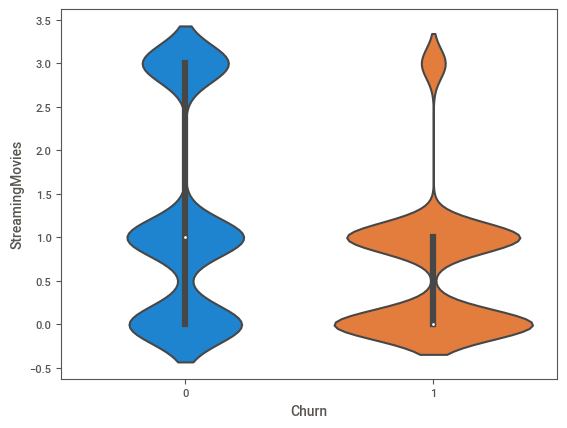

In [34]:
sns.violinplot(df['Churn'],df['StreamingMovies'])

For StreamingMovies, 0=no, 1=yes, and 3=no internet service. Again, we find that more customers tend to churn, irrgardless of them having streaming movies or not, but less customers with no internet service will churn.

<AxesSubplot:xlabel='Churn', ylabel='PaymentMethod'>

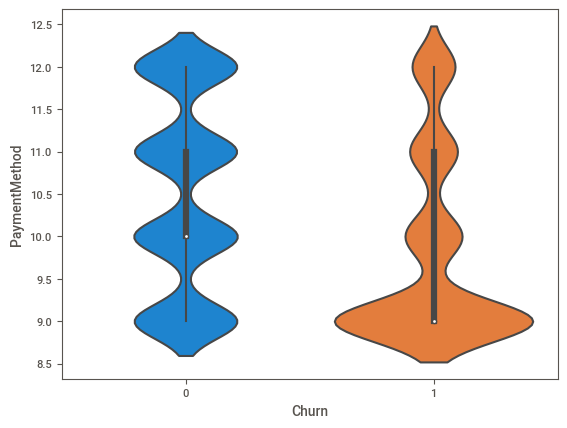

In [35]:
sns.violinplot(df['Churn'],df['PaymentMethod'])

For PaymentMethod, 9=electronic check, 10=mailed check, 11=automatic bank transfer, and 12=automatic credit card. An even proportion of customers across all 4 payment types do not churn, but a higher proportion of customers who pay by electronic check tend to churn than the other 3 payment types.

<AxesSubplot:xlabel='Churn', ylabel='DeviceProtection'>

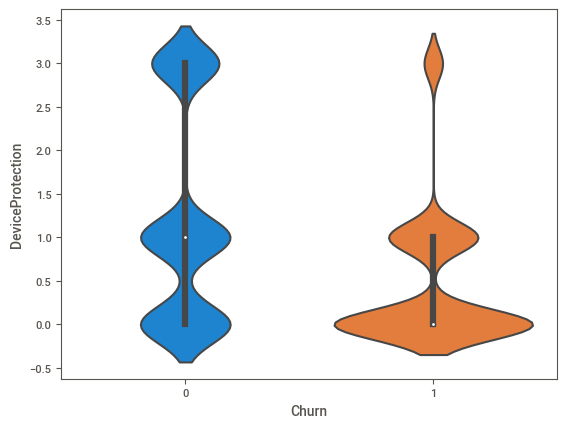

In [36]:
sns.violinplot(df['Churn'],df['DeviceProtection'])

For DeviceProtection, 0=no, 1=yes, and 3=no internet service. More customers with no device protection tend to churn, but there is an approximately equal proportion of customers across all device protection categories who do not churn. 

<AxesSubplot:xlabel='Churn', ylabel='OnlineBackup'>

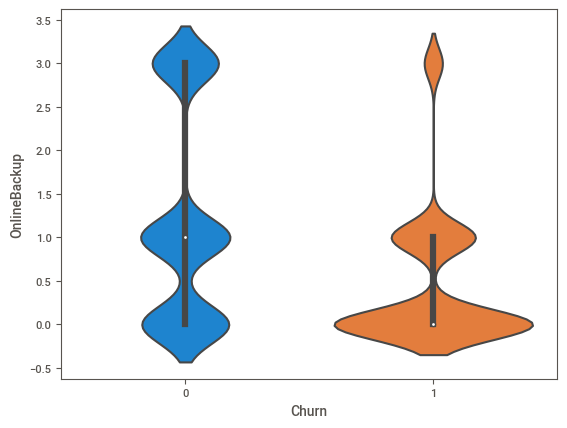

In [37]:
sns.violinplot(df['Churn'],df['OnlineBackup'])

For OnlineBackup, 0=no, 1=yes, and 3=no internet service. Again, more customers with no online backup tend to churn.

<AxesSubplot:xlabel='Churn', ylabel='TechSupport'>

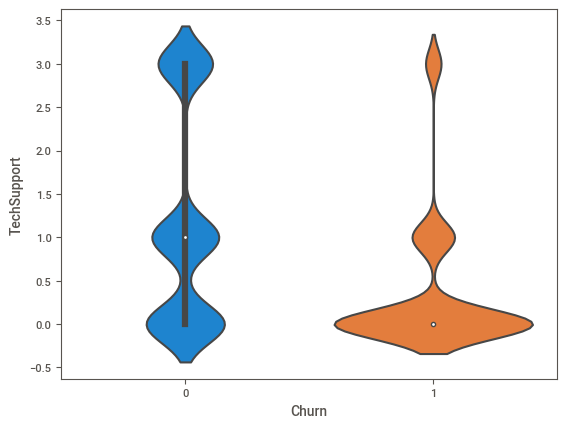

In [38]:
sns.violinplot(df['Churn'],df['TechSupport'])

For TechSupport, 0=no, 1=yes, and 3=no internet service. Again, more customers with no tech support tend to churn.

<AxesSubplot:xlabel='Churn', ylabel='OnlineSecurity'>

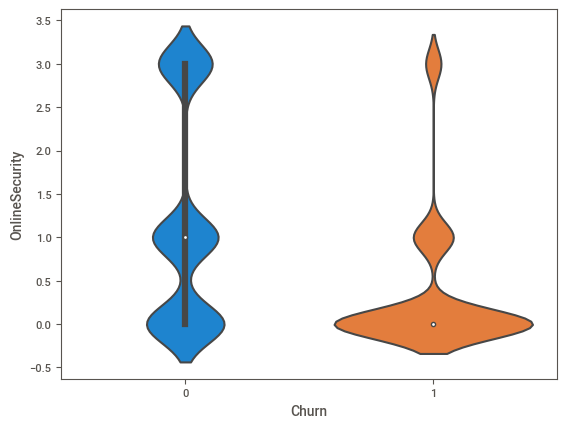

In [39]:
sns.violinplot(df['Churn'],df['OnlineSecurity'])

For OnlineSecurity, 0=no, 1=yes, and 3=no internet service. Again, more customers with no tech support tend to churn.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

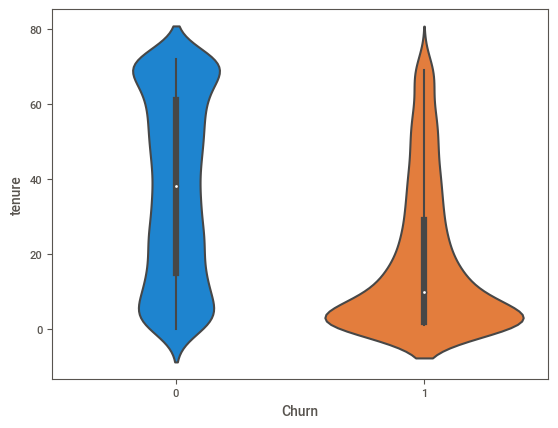

In [40]:
sns.violinplot(df['Churn'],df['tenure'])

Customers with a short tenure tend to churn more.

<AxesSubplot:xlabel='Churn', ylabel='Contract'>

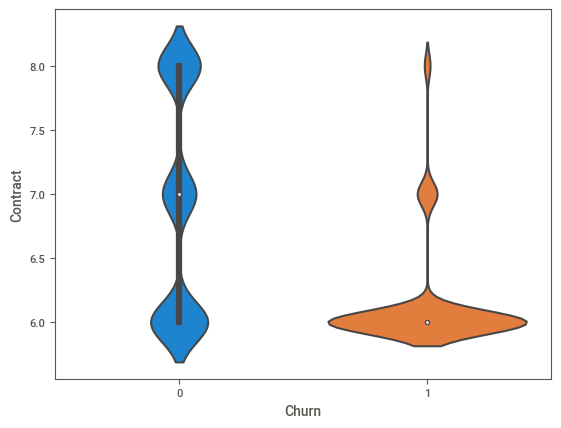

In [41]:
sns.violinplot(df['Churn'],df['Contract'])

For Contract, 6=Month-to-month, 7=one year, and 8=two years. Customers with month-to-month contracts tend to churn the most.

From this analysis, we have narrowed down the most important variables that affect churn for this dataset:
- fiber optic as the internet service
- higher monthly charges
- non-senior citizens
- customers with no partners
- customers with no dependents
- lower total charges
- payment by electronic check
- no device protection
- no online backup
- no tech support
- short tenure
- month-to-month contract

We will investigate these variables more closely when it is time to apply a machine learning model(s) to this dataset. For now, we have simply identified that these variables have a significant effect on churn.

## Step Four: Split the dataset into training and test datasets (80/20 ratio). 
- Using SweetViz’s ‘compare’ command, contrast the training vs test datasets on the target (‘churn’)

In [42]:
# splitting the data into an 80% training/20% testing set
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [43]:
# checking the shape of the training set
train.shape

(5633, 21)

In [44]:
# checking the shape of the testing set
test.shape

(1409, 21)

In [45]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1730,3877-JRJIP,1,0,0,0,1,1,1,4,0,...,0,0,1,0,6,1,9,59.85,59.85,1
1213,6980-IMXXE,0,0,1,1,69,1,0,0,3,...,3,3,3,3,8,0,11,20.20,1412.65,0
1434,1571-SAVHK,1,0,0,0,12,1,1,5,0,...,0,1,1,1,6,1,10,99.95,1132.75,1
2273,0219-QAERP,1,0,1,0,30,1,0,0,3,...,3,3,3,3,7,0,12,19.80,576.65,0
1703,8158-WPEZG,1,0,0,0,11,0,2,4,0,...,0,1,0,0,6,1,9,35.65,425.10,0


In [46]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1742,5318-IXUZF,0,0,0,0,2,1,0,5,0,...,0,0,1,0,6,1,11,87.15,183.75,1
458,4237-CLSMM,1,0,1,0,2,1,0,0,3,...,3,3,3,3,6,0,10,20.00,38.00,0
178,5947-SGKCL,0,0,1,1,15,1,1,5,0,...,1,0,1,1,6,1,11,105.35,1559.25,0
4883,5233-GEEAX,1,1,0,0,8,0,2,4,0,...,1,0,0,0,6,1,9,29.40,221.90,1
3613,1925-LFCZZ,1,1,0,0,55,0,2,4,0,...,1,0,1,1,7,1,11,50.05,2743.45,0


In [47]:
# using SweetViz to examine both sets
ml_eda=sv.compare(train,test,'Churn')
ml_eda.show_html('ml_eda.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)

Report ml_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Step Five: State limitations/issues (if any) with the given dataset.

This is a large dataset with a lot of categorical variables. We have provided an EDA for this dataset by converting the categorical data to numerical. We also identified possible variables that significantly affect churn more than other variables.

One potential issue in the dataset is the correlation of variables. We noted that variables with high correlations to churn did not necessarily have a significant correlation with churn, whereas some variables with negative correlations provided some insight into effects on churn. We will investigate the effects of these variables on churn when it is time to build the machine learning model.